In [22]:
import pyvo as vo
import matplotlib.pyplot as plt
import scipy.stats as sp
import scipy.special as spc
import numpy as np
import pandas as pd

In [23]:
service = vo.dal.TAPService("http://voparis-tap-planeto.obspm.fr/tap") #Elegimos de donde sacar los datos
query = """SELECT target_name,mass,period,star_spec_type, star_mass, detection_type, star_distance, semi_major_axis, radius, star_age
	FROM exoplanet.epn_core""" #Elegimos los datos que queremos.
#Los convertimos en un array
datos = service.search(query)
#Los convertimos en un dataframe para trabajar con pandas.
datos = datos.to_table().to_pandas()

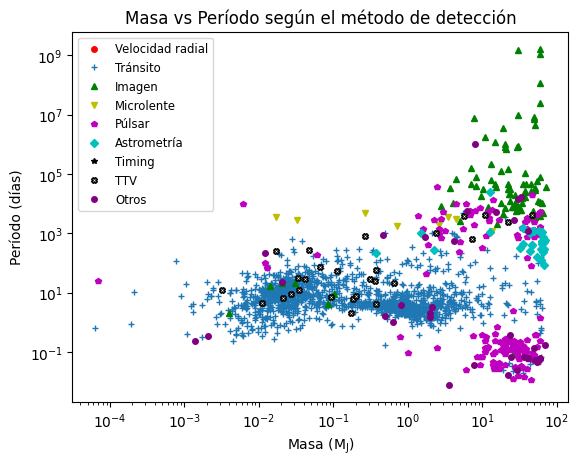

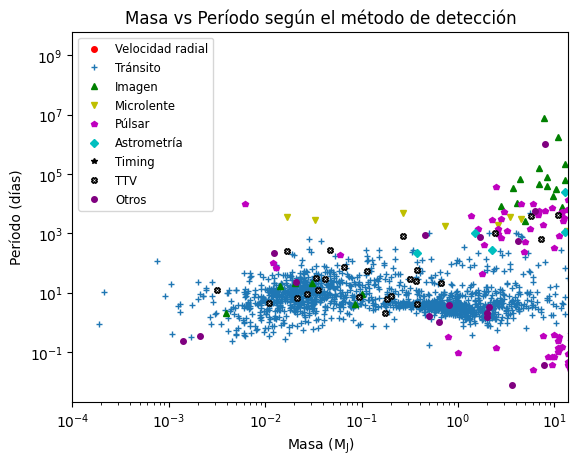

In [24]:
# Ahora, separamos los planetas según su método de detección

velrad_check = datos.loc[:, 'detection_type'] == 'Radial velocity' #Filtramos los planetas que han sido detectados por velocidad radial
velrad = datos.loc[velrad_check] #Los separamos en un nuevo data frame.

#Y así con los demás métodos de detección

transit_check = datos.loc[:, 'detection_type'] == 'Primary Transit'
transit = datos.loc[transit_check]

imagen_check = datos.loc[:, 'detection_type'] == 'Imaging'
imagen = datos.loc[imagen_check]

microlens_check = datos.loc[:, 'detection_type'] == 'Microlensing'
microlens = datos.loc[microlens_check]

pulsar_check = datos.loc[:, 'detection_type'] == 'Pulsar'
pulsar = datos.loc[pulsar_check]

astrometry_check = datos.loc[:, 'detection_type'] == 'Astrometry'
astrometria = datos.loc[astrometry_check]

timing_check = datos.loc[:, 'detection_type'] == 'Timing'
timing = datos.loc[timing_check]

TTV_check = datos.loc[:, 'detection_type'] == 'TTV'
TTV = datos.loc[TTV_check]

otros_check = datos.loc[:, 'detection_type'] == 'Other'
otros = datos.loc[otros_check]

#Graficamos los datos

plt.plot(velrad['mass'], velrad['period'], 'ro', markersize=4, label='Velocidad radial')  
plt.plot(transit['mass'], transit['period'], '+', markersize=4, label='Tránsito')       
plt.plot(imagen['mass'], imagen['period'], 'g^', markersize=4, label='Imagen')           
plt.plot(microlens['mass'], microlens['period'], 'yv', markersize=4, label='Microlente') 
plt.plot(pulsar['mass'], pulsar['period'], 'mp', markersize=4, label='Púlsar')           
plt.plot(astrometria['mass'], astrometria['period'], 'cD', markersize=4, label='Astrometría')  
plt.plot(timing['mass'], timing['period'], 'k*', markersize=4, label='Timing')           
plt.plot(TTV['mass'], TTV['period'], 'wX', markersize=4, label='TTV', markeredgecolor='black') 
plt.plot(otros['mass'], otros['period'], 'o', color='purple', markersize=4, label='Otros')     
plt.xlabel('Masa (M$_\mathrm{J}$)')
plt.ylabel('Período (días)')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left', fontsize='small')
plt.title('Masa vs Período según el método de detección')
plt.show()


#Un gráfico sin escala logarítmica en x pero recortando para 14 masas de Júpiter

plt.plot(velrad['mass'], velrad['period'], 'ro', markersize=4, label='Velocidad radial')  
plt.plot(transit['mass'], transit['period'], '+', markersize=4, label='Tránsito')       
plt.plot(imagen['mass'], imagen['period'], 'g^', markersize=4, label='Imagen')           
plt.plot(microlens['mass'], microlens['period'], 'yv', markersize=4, label='Microlente') 
plt.plot(pulsar['mass'], pulsar['period'], 'mp', markersize=4, label='Púlsar')           
plt.plot(astrometria['mass'], astrometria['period'], 'cD', markersize=4, label='Astrometría')  
plt.plot(timing['mass'], timing['period'], 'k*', markersize=4, label='Timing')           
plt.plot(TTV['mass'], TTV['period'], 'wX', markersize=4, label='TTV', markeredgecolor='black') 
plt.plot(otros['mass'], otros['period'], 'o', color='purple', markersize=4, label='Otros')     
plt.xlabel('Masa (M$_\mathrm{J}$)')
plt.ylabel('Período (días)')
plt.xlim(0.0001, 14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left', fontsize='small')
plt.title('Masa vs Período según el método de detección')
plt.show()

Ejercicio 3

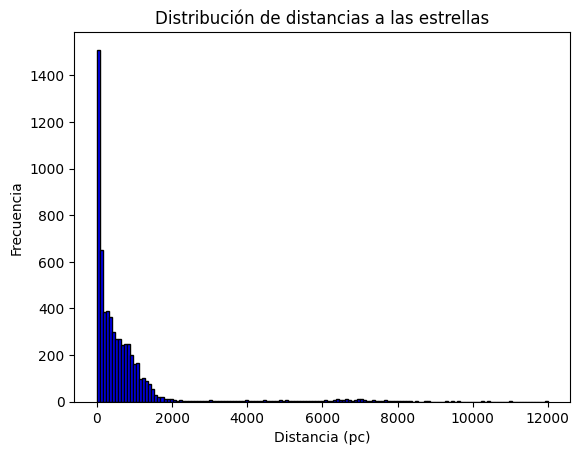

In [25]:
distancia = datos['star_distance']
plt.hist(distancia, color='blue', edgecolor='black', bins='auto')
plt.title('Distribución de distancias a las estrellas')
plt.xlabel('Distancia (pc)')
plt.ylabel('Frecuencia')
plt.show()

Realizamos un test KS para compararlo con una distribución normal y luego una exponencial

In [40]:
va = datos['star_distance']
n = len(va)
#Ejes Y de las acumuladas, empezando desde 1 o desde 0
Smas = np.arange(1, n+1)/n
Smen = np.arange(0,	n)/n
teog = sp.norm.cdf(va, np.mean(va), np.std(va))
Des = np.append(teog - Smen, Smas - teog)
D = max(abs(Des))
test = D *	np.sqrt(n)
alpha = spc.kolmogi(0.05)
print('El test para una distribución normal es:', test, 'pero el valor crítico es:', alpha, 'por lo tanto no es una Gaussiana')

#Ahora, con una exponencial:

teoexp =	sp.expon.cdf(va)

Desexp = np.append(teoexp - Smen, Smas - teoexp)
Dexp = max(abs(Desexp))
testexp = Dexp * np.sqrt(n)
print('El test para una distribución exponencial es:', testexp, 'pero el valor crítico es:', alpha, 'por lo tanto no es una exponencial')


El test para una distribución normal es: 82.1559300554149 pero el valor crítico es: 1.3580986393225507 por lo tanto no es una Gaussiana
El test para una distribución exponencial es: 85.65628990331005 pero el valor crítico es: 1.3580986393225507 por lo tanto no es una exponencial


Lo cual claramente es una distribución exponencial, porque si está más lejos cuesta más verlo xD

Ejercicio 4

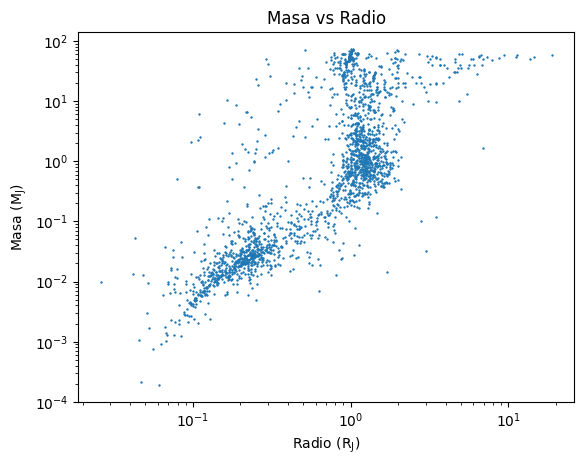

In [27]:
r = datos['radius']
m =	datos['mass']
plt.plot(r, m, '+', markersize=2)
plt.xlabel('Radio (R$_\mathrm{J}$)')
plt.ylabel('Masa (M$_\mathrm{J}$)')
plt.xscale('log')
plt.yscale('log')
plt.title('Masa vs Radio')
plt.show()

Tiene pinta de cúbica, probemos eso:

$y = log(M)$

$x = log(R)$

Propongo:

$y = ax^3+bx^2+c$

(array([-0.56255923, -0.56147257,  2.33523033,  0.24275012]), array([1114.90009542]), np.int32(4), array([1.73645172, 0.83341655, 0.41853344, 0.33909002]), np.float64(4.434230760352875e-13))


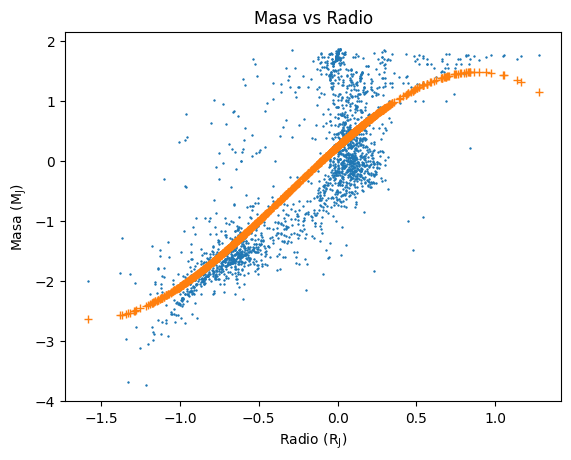

In [28]:
#Para ajustar primero sacamos los NaNs porque sino explota.
# Crear máscaras para identificar NaNs
mask_r = np.isnan(r)
mask_m = np.isnan(m)

# Crear una máscara combinada que sea True donde haya NaNs en cualquiera de los dos arrays
combined_mask = mask_r | mask_m

# Filtrar los arrays para eliminar los NaNs
r_sin_nan = r[~combined_mask]
m_sin_nan = m[~combined_mask]


lr = np.log10(r_sin_nan)
lm = np.log10(m_sin_nan)

ajuste = np.polyfit(lr, lm, 3, full=True, cov=True)
print(ajuste)
plt.plot(lr, lm, '+', markersize=2)
plt.plot(lr, np.polyval(ajuste[0], lr), '+')
plt.xlabel('Radio (R$_\mathrm{J}$)')
plt.ylabel('Masa (M$_\mathrm{J}$)')
plt.title('Masa vs Radio')
plt.show()

Ejercicio 5

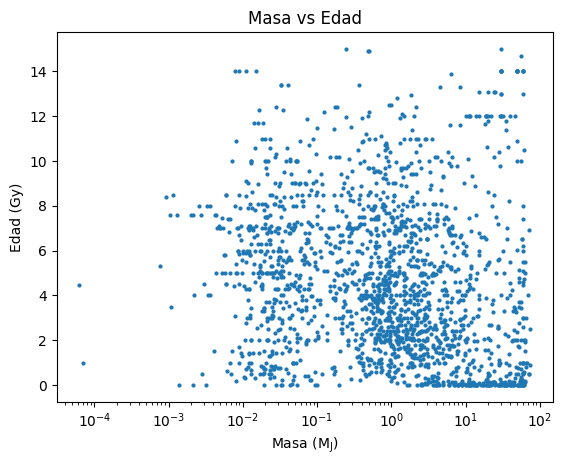

In [29]:
edad = datos['star_age']

plt.plot(m,	edad, 'o', markersize=2)
plt.xlabel('Masa (M$_\mathrm{J}$)')
plt.ylabel('Edad (Gy)')
plt.xscale('log')
#plt.yscale('log')
plt.title('Masa vs Edad')
plt.show()

Las más viejas parecen tener menos planetas.